# Keras Classification

Keras Documentation: https://keras.io

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## 1. Read data & create train/test split

In [2]:
df = pd.read_csv('../data/geoloc_elev.csv')

# we only use the 2 features that matter
X = df[['lat', 'lon']].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size = 0.3, random_state=0)

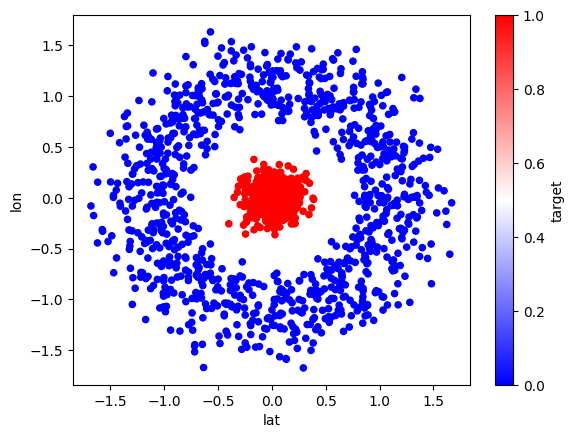

In [3]:
df.plot(kind='scatter',
        x='lat',
        y='lon',
        c='target',
        cmap='bwr');

## 2. Shallow neural network

In [5]:
!pip3 install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 3.7 MB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 8.7 MB/s eta 0:00:000:00:010:00:01:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 9.4 MB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 10.7 MB/s eta 0:00:000:00:01
  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 9.6 MB/s eta 0:00:00m eta 0:00:0100:01:01
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached libclang-14.0.6-py2.py3-none-manylinux2010_x86_64.w

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

2022-09-11 20:48:28.014929: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-11 20:48:28.224473: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-11 20:48:28.224502: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-11 20:48:28.255760: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-11 20:48:28.879086: W tensorflow/stream_executor/platform/de

In [7]:
model = Sequential([
    Dense(1, input_dim=2, activation='sigmoid')
])

model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

h = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10


2022-09-11 20:48:35.250108: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-09-11 20:48:35.250236: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lopta): /proc/driver/nvidia/version does not exist
2022-09-11 20:48:35.251191: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/milan/anaconda3/envs/ztdl-5-day-bootcamp/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


30/30 [==============================] - 0s 5ms/step - loss: 0.6634 - accuracy: 0.5979 - val_loss: 0.6557 - val_accuracy: 0.6381
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.6582 - val_loss: 0.6552 - val_accuracy: 0.6381
Epoch 3/10
30/30 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.6582 - val_loss: 0.6556 - val_accuracy: 0.6381
Epoch 4/10
30/30 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.6582 - val_loss: 0.6544 - val_accuracy: 0.6381
Epoch 5/10
30/30 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.6582 - val_loss: 0.6565 - val_accuracy: 0.6381
Epoch 6/10
30/30 [==============================] - 0s 2ms/step - loss: 0.6441 - accuracy: 0.6582 - val_loss: 0.6567 - val_accuracy: 0.6381
Epoch 7/10
30/30 [==============================] - 0s 3ms/step - loss: 0.6446 - accuracy: 0.6582 - val_loss: 0.6566 - val_accuracy: 0.6381
Epoch 8/10
30/30 [=============

<AxesSubplot:>

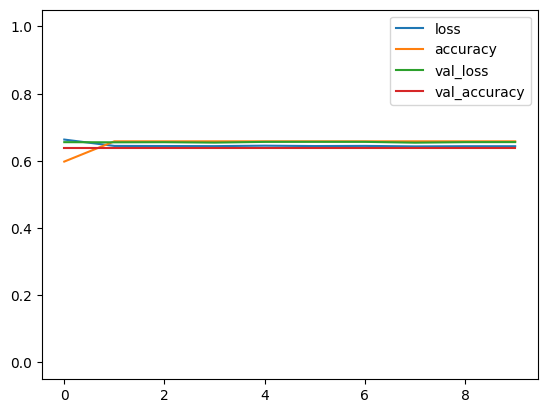

In [8]:
pd.DataFrame(h.history).plot(ylim=(-0.05, 1.05))

## 3. Deep neural network

In [9]:
model = Sequential([
    Dense(4, input_dim=2, activation='tanh'),
    Dense(4, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

h = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
30/30 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6550 - val_loss: 0.6494 - val_accuracy: 0.6381
Epoch 2/20
30/30 [==============================] - 0s 2ms/step - loss: 0.6237 - accuracy: 0.6582 - val_loss: 0.6035 - val_accuracy: 0.6381
Epoch 3/20
30/30 [==============================] - 0s 3ms/step - loss: 0.5233 - accuracy: 0.6688 - val_loss: 0.4234 - val_accuracy: 0.9048
Epoch 4/20
30/30 [==============================] - 0s 2ms/step - loss: 0.3578 - accuracy: 0.8910 - val_loss: 0.3098 - val_accuracy: 0.8857
Epoch 5/20
30/30 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9683 - val_loss: 0.1391 - val_accuracy: 0.9905
Epoch 6/20
30/30 [==============================] - 0s 2ms/step - loss: 0.1000 - accuracy: 0.9979 - val_loss: 0.0813 - val_accuracy: 0.9905
Epoch 7/20
30/30 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 1.0000 - val_loss: 0.0555 - val_accuracy: 0.9905
Epoch 8/20
30/30 [==

<AxesSubplot:>

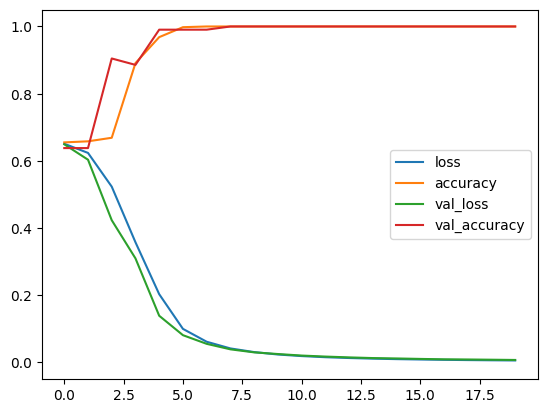

In [10]:
pd.DataFrame(h.history).plot(ylim=(-0.05, 1.05))

## 4. Accuracy score on benchmark, train and test sets

In [11]:
bm_score = pd.Series(y).value_counts()[0] / len(y)
train_score = model.evaluate(X_train, y_train, verbose=0)[1]
test_score = model.evaluate(X_test, y_test,  verbose=0)[1]

print("""Accuracy scores:
   Benchmark:\t{:0.3}
   Train:\t{:0.3}
   Test:\t{:0.3}""".format(bm_score, train_score, test_score))

Accuracy scores:
   Benchmark:	0.667
   Train:	1.0
   Test:	1.0


In [16]:
# model.predict(X_test)

## 5. Confusion Matrix and Classification Report

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict_classes(X_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm,
             index=["Miss", "Hit"],
             columns=['pred_Miss', 'pred_Hit'])

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
print(classification_report(y_test, y_pred))

## 6. Display the decision boundary

319/319 [==============================] - 0s 1ms/step


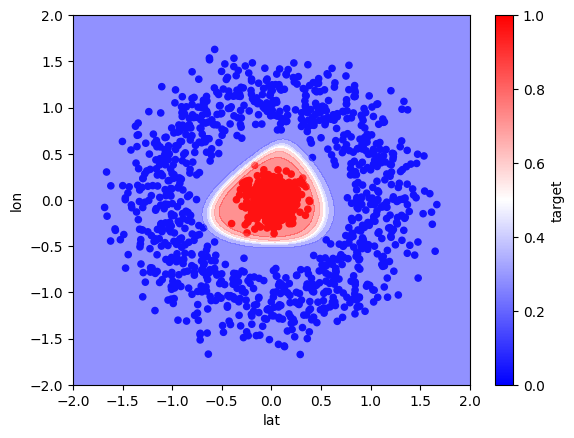

In [21]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = model.predict(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)

## Exercise 1

- Try changing the network architecture and re-train the model at each change. Can you make it converge faster?
    - add 1 inner layer
    - change the number of nodes in each layer
    - change the activation function
    - change the optimizer (have a look at https://keras.io/optimizers)